# Hello world example

In this example we demonstrate the very basics of the ``RemoteFrameBuffer`` class.

In [1]:
import numpy as np
import jupyter_rfb

We start by implementing ``get_frame()`` to produce an image.

RFBOutputContext()


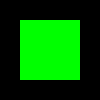

HelloWorld1()

In [2]:
class HelloWorld1(jupyter_rfb.RemoteFrameBuffer):
   
    def get_frame(self):
        a = np.zeros((100, 100, 3), np.uint8)
        a[20:-20,20:-20,1] = 255
        return a

w = HelloWorld1()
w

Let's make it a bit more advanced. By keeping track of the widget size, we can provide an array with matching shape. We also take pixel_ratio into account, in case this is a hidpi display, or when the user has used the browser's zoom.

RFBOutputContext()


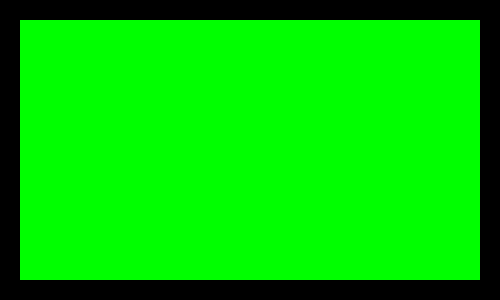

HelloWorld2()

In [3]:
class HelloWorld2(jupyter_rfb.RemoteFrameBuffer):
    
    def handle_event(self, event):
        if event["event_type"] == "resize":
            self._size = event
            # self.print(event)  # uncomment to display the event
        
    def get_frame(self):
        w, h, r = self._size["width"], self._size["height"], self._size["pixel_ratio"]
        physical_size = int(h*r), int(w*r)
        a = np.zeros((physical_size[0], physical_size[1], 3), np.uint8)
        margin = int(20 * r)
        a[margin:-margin,margin:-margin,1] = 255
        return a

w = HelloWorld2()
w

If this is a live session, try resizing the widget to see how it adjusts.